<h3>Arrivat, Marie - Rajput, Rehan Razzaque</h3>
<h1>Anomaly Detection (AD)</h1>
<hr style="height:2px;border:none;color:#333;background-color:#333;"/>
<i>3<sup>th</sup> May 2019</i>

Anomaly detection (AD) refers to the process of detecting data points that do not conform with the rest of observations. Applications of anomaly detection include fraud and fault detection, surveillance, diagnosis, data cleanup, predictive maintenance.

When we talk about AD, we usually look at it as an unsupervised (or semi-supervised) task, where the concept of anomaly is often not well defined or, in the best case, just few samples are labeled as anomalous. In this challenge, you will look at AD from a different perspective!

The dataset you are going to work on consists of monitoring data generated by IT systems; such data is then processed by a monitoring system that executes some checks and detects a series of anomalies. This is a multi-label classification problem, where each check is a binary label corresponding to a specific type of anomaly. Your goal is to develop a machine learning model (or multiple ones) to accurately detect such anomalies.

This will also involve a mixture of data exploration, pre-processing, model selection, and performance evaluation. You will also be asked to try one or more rule learning models, and compare them with other ML models both in terms of predictive performances and interpretability. Interpreatibility is indeed a strong requirement especially in applications like AD where understanding the output of a model is as important as the output itself.

Please, bear in mind that the purpose of this challenge is not simply to find the best-performing model. You should rather make sure to understand the difficulties that come with this AD task.

<div class="">
    <h2>Dataset Description</h2>
    <hr style="height:1px;border:none;color:#333;background-color:#333;"/>    
</div>

#### * Location of the Dataset on zoe
The data for this challenge is located at: `/mnt/datasets/anomaly`

#### * Files

You have a unique csv file with 36 features and 8 labels.
Each record contains aggregate features computed over a given amount of time.

#### * Attributes

A brief outline of the available attributes is given below.

1. <i>SessionNumber</i> (INTEGER): it identifies the session on which data is collected;
* <i>SystemID</i> (INTEGER): it identifies the system generating the data;
* <i>Date</i> (DATE): collection date;
* <i>HighPriorityAlerts</i> (INTEGER [0, N]): number of high priority alerts in the session;
* <i>Dumps</i> (INTEGER [0, N]): number of memory dumps;
* <i>CleanupOOMDumps</i> (INTEGER) [0, N]): number of cleanup OOM dumps;
* <i>CompositeOOMDums</i> (INTEGER [0, N]): number of composite OOM dumps;
* <i>IndexServerRestarts</i> (INTEGER [0, N]): number of restarts of the index server;
* <i>NameServerRestarts</i> (INTEGER [0, N]): number of restarts of the name server;
* <i>XSEngineRestarts</i> (INTEGER [0, N]): number of restarts of the XSEngine;
* <i>PreprocessorRestarts</i> (INTEGER [0, N]): number of restarts of the preprocessor;
* <i>DaemonRestarts</i> (INTEGER [0, N]): number of restarts of the daemon process;
* <i>StatisticsServerRestarts</i> (INTEGER [0, N]): number of restarts of the statistics server;
* <i>CPU</i> (FLOAT [0, 100]): cpu usage;
* <i>PhysMEM</i> (FLOAT [0, 100]): physical memory;
* <i>InstanceMEM</i> (FLOAT [0, 100]): memory usage of one instance of the system;
* <i>TablesAllocation</i> (FLOAT [0, 100]): memory allocated for tables;
* <i>IndexServerAllocationLimit</i> (FLOAT [0, 100]): level of memory used by index server;
* <i>ColumnUnloads</i> (INTEGER [0, N]): number of columns unloaded from the tables;
* <i>DeltaSize</i> (INTEGER [0, N]): size of the delta store;
* <i>MergeErrors</i> BOOLEAN [0, 1]: 1 if there are merge errors;
* <i>BlockingPhaseSec</i> (INTEGER [0, N]): blocking phase duration in seconds;
* <i>Disk</i> (FLOAT [0, 100]): disk usage;
* <i>LargestTableSize</i> (INTEGER [0, N]): size of the largest table;
* <i>LargestPartitionSize</i> (INTEGER [0, N]): size of the largest partition of a table;
* <i>DiagnosisFiles</i> (INTEGER [0, N]): number of diagnosis files;
* <i>DiagnosisFilesSize</i> (INTEGER [0, N]): size of diagnosis files;
* <i>DaysWithSuccessfulDataBackups</i> (INTEGER [0, N]): number of days with successful data backups;
* <i>DaysWithSuccessfulLogBackups</i> (INTEGER [0, N]): number of days with successful log backups;
* <i>DaysWithFailedDataBackups</i> (INTEGER [0, N]): number of days with failed data backups;
* <i>DaysWithFailedfulLogBackups</i> (INTEGER [0, N]): number of days with failed log backups;
* <i>MinDailyNumberOfSuccessfulDataBackups</i> (INTEGER [0, N]): minimum number of successful data backups per day;
* <i>MinDailyNumberOfSuccessfulLogBackups</i> (INTEGER [0, N]): minimum number of successful log backups per day;
* <i>MaxDailyNumberOfFailedDataBackups</i> (INTEGER [0, N]): maximum number of failed data backups per day;
* <i>MaxDailyNumberOfFailedLogBackups</i> (INTEGER [0, N]): maximum number of failed log backups per day;
* <i>LogSegmentChange</i> (INTEGER [0, N]): changes in the number of log segments.

#### * Labels

Labels are binary. Each label refers to a different anomaly.

* <i>Check1</i>;
* <i>Check2</i>;
* <i>Check3</i>;
* <i>Check4</i>;
* <i>Check5</i>;
* <i>Check6</i>;
* <i>Check7</i>;
* <i>Check8</i>;

In [1]:
!pip install fim
!pip install ruleset

You are using pip version 18.0, however version 20.0.2 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.
You are using pip version 18.0, however version 20.0.2 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn
import ruleset as rs
import sklearn.tree as trees
from IPython import display
import sklearn.ensemble as ensem
import sklearn.metrics as met
import sklearn.model_selection as model_selection
import sklearn.preprocessing as preprocess
import sklearn.decomposition as decom
import ruleset as rs
from graphviz import Source

<b> Defining expected types </b>

<p> Some values are expected to have a certain type (float between 0 and 1, integer, positive integer...). Here, we split the types in order to check if the types are the good ones later on. </p>

In [3]:
float_0_100 = ["CPU", "PhysMEM", "InstanceMEM", "TablesAllocation", "IndexServerAllocationLimit", "Disk"]
positive_integers = ["HighPriorityAlerts", "Dumps", "CleanupOOMDumps", "CompositeOOMDums", "IndexServerRestarts", "NameServerRestarts", "XSEngineRestarts", "PreprocessorRestarts", "DaemonRestarts", "StatisticsServerRestarts","ColumnUnloads", "DeltaSize ", "BlockingPhaseSec", "LargestTableSize", "LargestPartitionSize", "DiagnosisFiles","DiagnosisFilesSize", "DaysWithSuccessfulDataBackups","DaysWithSuccessfulLogBackups", "DaysWithFailedDataBackups","DaysWithFailedfulLogBackups", "MinDailyNumberOfSuccessfulDataBackups","MinDailyNumberOfSuccessfulLogBackups","MaxDailyNumberOfFailedDataBackups", "MaxDailyNumberOfFailedLogBackups","LogSegmentChange"]
integers = ["SessionNumber", "SystemID"]
all_integers = integers + positive_integers
booleans = ["MergeErrors"]

<b> Checking the data </b>

In [4]:
head_tags = ['SessionNumber','SystemID','Date','HighPriorityAlerts','Dumps','CleanupOOMDumps','CompositeOOMDums','IndexServerRestarts','NameServerRestarts',\
             'XSEngineRestarts','PreprocessorRestarts','DaemonRestarts','StatisticsServerRestarts','CPU','PhysMEM','InstanceMEM','TablesAllocation','IndexServerAllocationLimit',\
             'ColumnUnloads','DeltaSize','MergeErrors','BlockingPhaseSec','Disk','LargestTableSize','LargestPartitionSize','DiagnosisFiles','DiagnosisFilesSize',\
            'DaysWithSuccessfulDataBackups','DaysWithSuccessfulLogBackups','DaysWithFailedDataBackups','DaysWithFailedfulLogBackups','MinDailyNumberOfSuccessfulDataBackups',\
             'MinDailyNumberOfSuccessfulLogBackups','MaxDailyNumberOfFailedDataBackups','MaxDailyNumberOfFailedLogBackups','LogSegmentChange','Check1','Check2','Check3','Check4',\
             'Check5','Check6','Check7','Check8']
label_tags = head_tags[-8:]

In [5]:
data= pd.read_csv('/mnt/datasets/anomaly/data.csv',sep=';',names=head_tags)

In [6]:
data.drop(['Date'],inplace=True,axis=1)

<p> We considered that the 'Date' had nothing to offer to us, so we dropped it. </p>

In [7]:
for tag in label_tags:
    data = data[data[tag].notna()]

<b> Checking the Nans </b>

In [8]:
for column in data.columns:
    if(data[column].isna().sum() >= 1):
        print(column)

Dumps
CleanupOOMDumps
CompositeOOMDums
CPU
PhysMEM
InstanceMEM
IndexServerAllocationLimit
DeltaSize
BlockingPhaseSec
Disk
LargestTableSize
LargestPartitionSize
DiagnosisFiles
DiagnosisFilesSize
LogSegmentChange


<p> All the columns above have some Nan values. We can notice that all of the column types are or integers or floats, it means that we can fill them back with a number. </p>
<p> In order to fill the Nans back, we calculate the mean of all the values of the same column, so the new value won't be an outlier neither have an impact on the mean of the values. </p>
<p> Carefull: Since the columns have specific types, we shouldn't put a float mean if the type is an int. </p>

In [9]:
for column in data.columns:
    if(data[column].isna().sum() >= 1):
        m = data[column].mean()
        if(column in all_integers):
            data[column] = data[column].fillna(int(m))
        else:
            data[column] = data[column].fillna(m)

In [10]:
for column in data.columns:
    if(data[column].isna().sum() >= 1):
        print(column)

<p> The above cell doesn't print anything, it means that all the Nans have been removed/replaced. </p>

<b> Merging columns </b>

In [11]:
data.shape

(236611, 43)

In [12]:
feat_tags = list(set(data.columns).difference(set(label_tags)))

In [13]:
data.columns

Index(['SessionNumber', 'SystemID', 'HighPriorityAlerts', 'Dumps',
       'CleanupOOMDumps', 'CompositeOOMDums', 'IndexServerRestarts',
       'NameServerRestarts', 'XSEngineRestarts', 'PreprocessorRestarts',
       'DaemonRestarts', 'StatisticsServerRestarts', 'CPU', 'PhysMEM',
       'InstanceMEM', 'TablesAllocation', 'IndexServerAllocationLimit',
       'ColumnUnloads', 'DeltaSize', 'MergeErrors', 'BlockingPhaseSec', 'Disk',
       'LargestTableSize', 'LargestPartitionSize', 'DiagnosisFiles',
       'DiagnosisFilesSize', 'DaysWithSuccessfulDataBackups',
       'DaysWithSuccessfulLogBackups', 'DaysWithFailedDataBackups',
       'DaysWithFailedfulLogBackups', 'MinDailyNumberOfSuccessfulDataBackups',
       'MinDailyNumberOfSuccessfulLogBackups',
       'MaxDailyNumberOfFailedDataBackups', 'MaxDailyNumberOfFailedLogBackups',
       'LogSegmentChange', 'Check1', 'Check2', 'Check3', 'Check4', 'Check5',
       'Check6', 'Check7', 'Check8'],
      dtype='object')

<b> Changing the type of the data </b>

<p> In order to work better on the data, we set a coomon type that is float. </p>

In [14]:
data = data.apply(lambda x:np.float32(x))

<b> Visualizing the data </b>

/usr/local/lib/python3.5/dist-packages/statsmodels/nonparametric/kde.py:488: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
/usr/local/lib/python3.5/dist-packages/statsmodels/nonparametric/kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


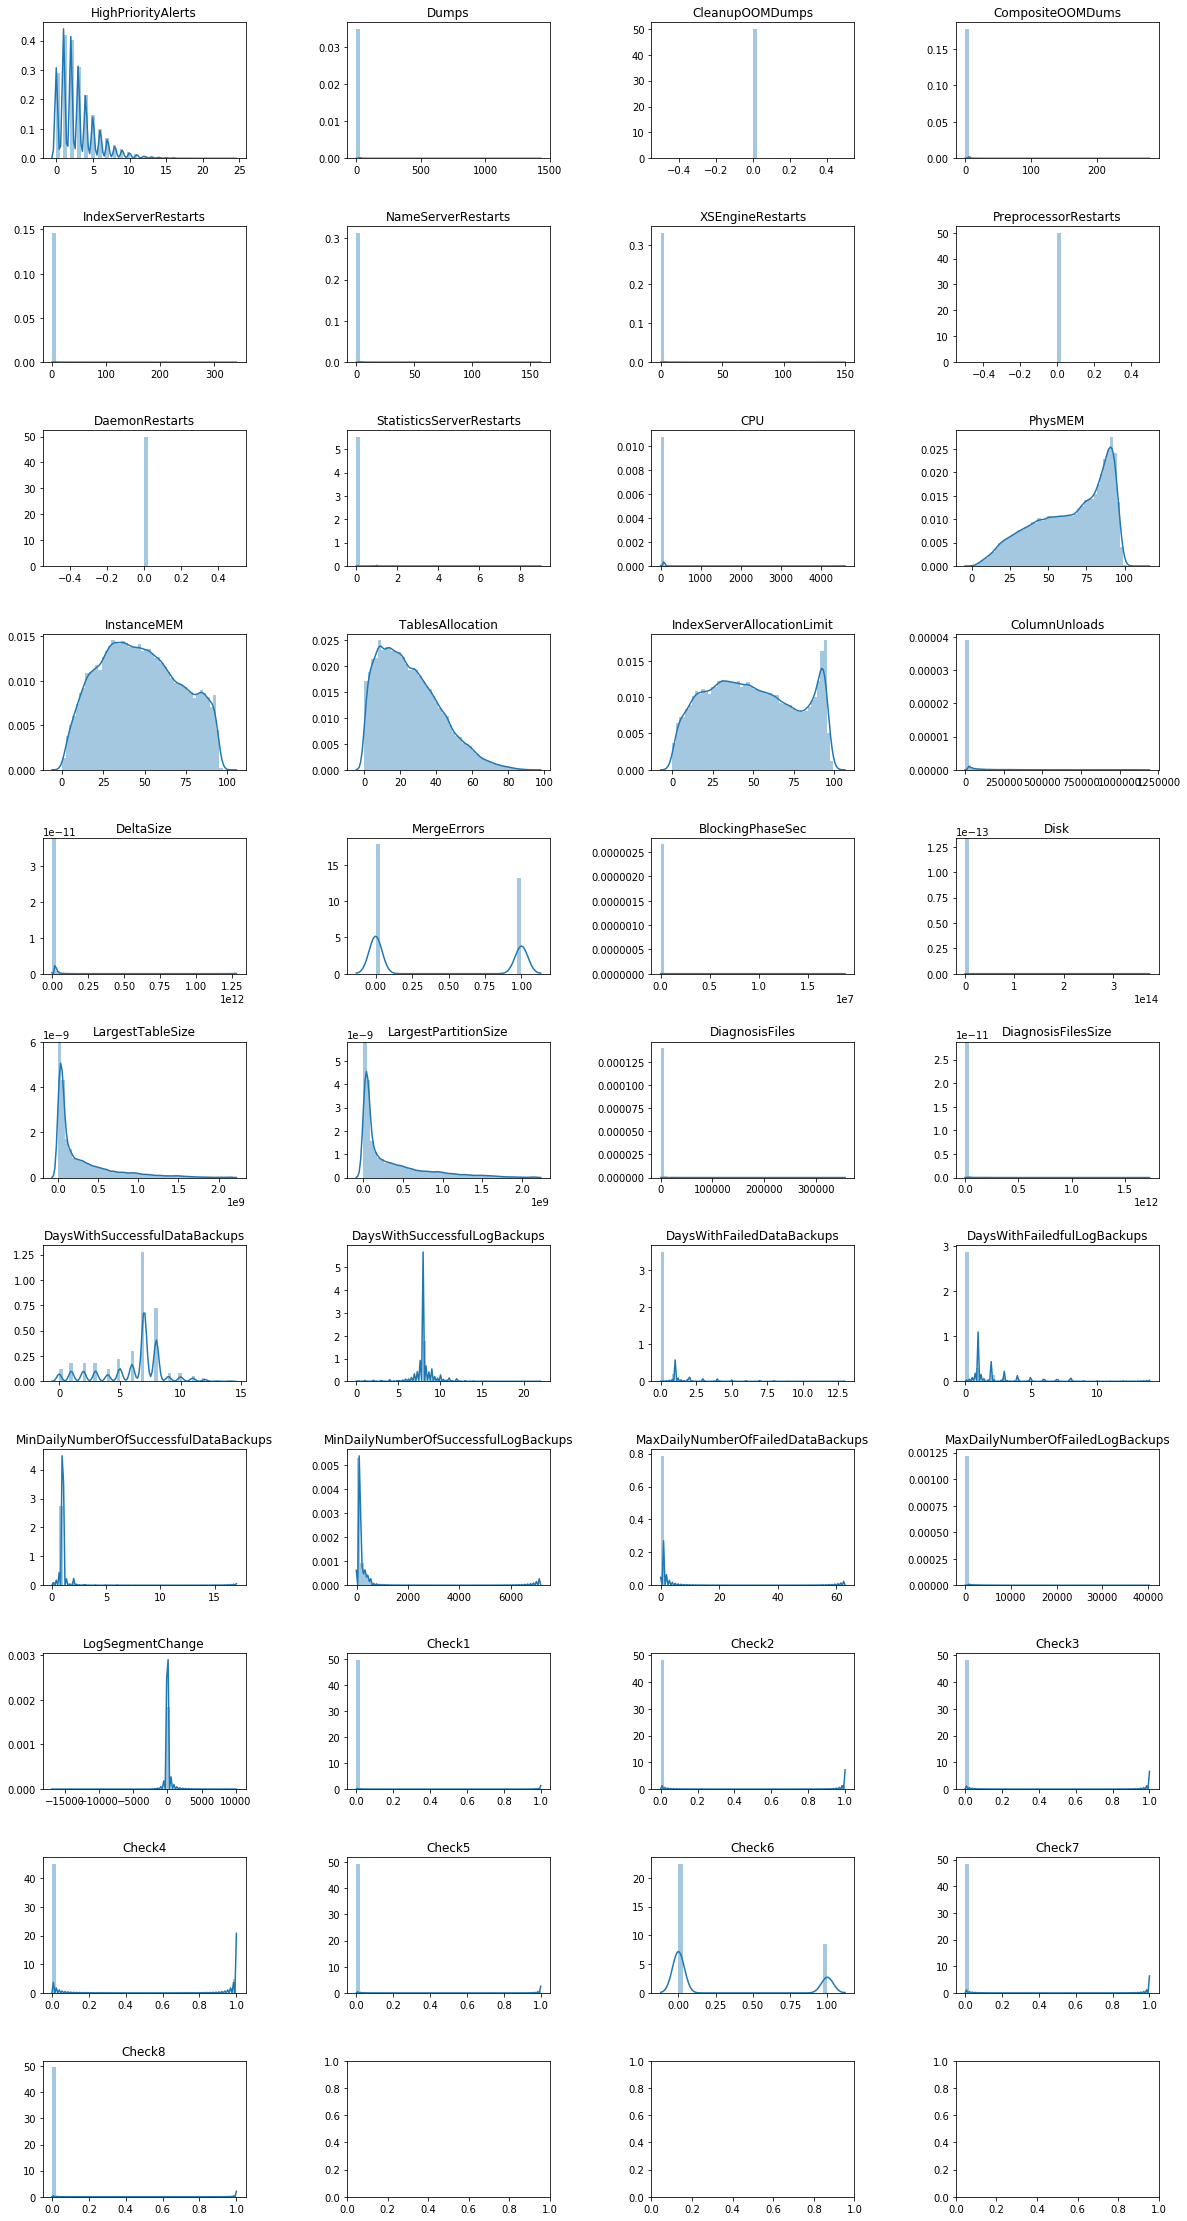

In [15]:
n = len(data.columns) + 1
r = 4
n1 = n//r
fig, axs = plt.subplots(n1, r,figsize=(20,40))
fig.subplots_adjust(wspace = 0.5, hspace = 0.5)
k = 2
for i in range(n1):
    for j in range(r):
        if(k>= n-1):
            break
        sn.distplot(data[data.columns[k]].values,ax=axs[i][j])
        axs[i][j].set_title(data.columns[k])
        k = k+1
plt.show()

<p> We realize that some of the features keep a near constant value for all the rows, so we remove them </p>

In [16]:
data.drop(['CleanupOOMDumps','PreprocessorRestarts','DaemonRestarts'],inplace=True,axis=1)

In [17]:
indexes = data.columns
indexes

Index(['SessionNumber', 'SystemID', 'HighPriorityAlerts', 'Dumps',
       'CompositeOOMDums', 'IndexServerRestarts', 'NameServerRestarts',
       'XSEngineRestarts', 'StatisticsServerRestarts', 'CPU', 'PhysMEM',
       'InstanceMEM', 'TablesAllocation', 'IndexServerAllocationLimit',
       'ColumnUnloads', 'DeltaSize', 'MergeErrors', 'BlockingPhaseSec', 'Disk',
       'LargestTableSize', 'LargestPartitionSize', 'DiagnosisFiles',
       'DiagnosisFilesSize', 'DaysWithSuccessfulDataBackups',
       'DaysWithSuccessfulLogBackups', 'DaysWithFailedDataBackups',
       'DaysWithFailedfulLogBackups', 'MinDailyNumberOfSuccessfulDataBackups',
       'MinDailyNumberOfSuccessfulLogBackups',
       'MaxDailyNumberOfFailedDataBackups', 'MaxDailyNumberOfFailedLogBackups',
       'LogSegmentChange', 'Check1', 'Check2', 'Check3', 'Check4', 'Check5',
       'Check6', 'Check7', 'Check8'],
      dtype='object')

<b> Checking columns anomalies </b>

<p> The idea now is to check if anomalies are detected when a value doesn't fit its expected type. </p>

In [18]:
Check = ['Check1',"Check2","Check3","Check4","Check5","Check6","Check7","Check8"]

<p> We create a new column that gives 1 if an anomaly has been detected by any of the Checks, 0 otherwise. </p>

In [19]:
data['Check'] = data['Check1'] + data['Check2'] + data['Check3'] + data['Check4'] + data['Check5'] + data['Check6'] + data['Check7']+ data['Check8']

In [20]:
data['Check'] = np.where(data['Check'] > 0, np.ones(data.shape[0]),np.zeros(data.shape[0]))

In [21]:
## We work only on the columns that have not been removed

final_float_0_100 = []
for column_name in float_0_100:
    if(column_name in indexes):
        final_float_0_100.append(column_name)
float_0_100

['CPU',
 'PhysMEM',
 'InstanceMEM',
 'TablesAllocation',
 'IndexServerAllocationLimit',
 'Disk']

In [22]:
for column_name in final_float_0_100:
    
    above_out = data[data[column_name] > 100]
    above_tot_out_of_range = len(above_out["Check"])
    above_tot_anomalies = 0
    for i in range(above_tot_out_of_range):
        above_tot_anomalies += above_out["Check"].iloc[i]
            
    under_out = data[data[column_name]< 0]
    under_tot_out_of_range = len(under_out["Check"])
    under_tot_anomalies = 0
    for i in range(under_tot_out_of_range):
        under_tot_anomalies += under_out["Check"].iloc[i]
            
    print('For ' + column_name + ", " + str(above_tot_anomalies) + " anomalies are detected out of " + str(above_tot_out_of_range) + " values greater than 100.")
    print('For ' + column_name + ", " + str(under_tot_anomalies) + " anomalies are detected out of " + str(under_tot_out_of_range) + " negative values.")

For CPU, 6.0 anomalies are detected out of 6 values greater than 100.
For CPU, 0 anomalies are detected out of 0 negative values.
For PhysMEM, 3.0 anomalies are detected out of 3 values greater than 100.
For PhysMEM, 0 anomalies are detected out of 0 negative values.
For InstanceMEM, 0 anomalies are detected out of 0 values greater than 100.
For InstanceMEM, 0 anomalies are detected out of 0 negative values.
For TablesAllocation, 0 anomalies are detected out of 0 values greater than 100.
For TablesAllocation, 0 anomalies are detected out of 0 negative values.
For IndexServerAllocationLimit, 0 anomalies are detected out of 0 values greater than 100.
For IndexServerAllocationLimit, 0 anomalies are detected out of 0 negative values.
For Disk, 1395.0 anomalies are detected out of 3209 values greater than 100.
For Disk, 0 anomalies are detected out of 0 negative values.


<p> We notice that <i>Disk</i> has a lot of values that are greater than 100. </p>
<p> Not all those anomalies are detected. It means that being in the expected range is not a criterion for the anomaly detection for <i>Disk</i>. </p>

In [23]:
## We work only on the columns that have not been removed

final_positive_integers = []
for column_name in positive_integers:
    if(column_name in indexes):
        final_positive_integers.append(column_name)
final_positive_integers

['HighPriorityAlerts',
 'Dumps',
 'CompositeOOMDums',
 'IndexServerRestarts',
 'NameServerRestarts',
 'XSEngineRestarts',
 'StatisticsServerRestarts',
 'ColumnUnloads',
 'BlockingPhaseSec',
 'LargestTableSize',
 'LargestPartitionSize',
 'DiagnosisFiles',
 'DiagnosisFilesSize',
 'DaysWithSuccessfulDataBackups',
 'DaysWithSuccessfulLogBackups',
 'DaysWithFailedDataBackups',
 'DaysWithFailedfulLogBackups',
 'MinDailyNumberOfSuccessfulDataBackups',
 'MinDailyNumberOfSuccessfulLogBackups',
 'MaxDailyNumberOfFailedDataBackups',
 'MaxDailyNumberOfFailedLogBackups',
 'LogSegmentChange']

In [24]:
# data[data['LogSegmentChange'].apply(float.is_integer) == False]

In [25]:
for column_name in final_positive_integers:
    not_integers = data[data[column_name].apply(float.is_integer) == False]
    not_integers_tot = len(not_integers["Check"])
    not_integers_anomalies = 0
    for i in range(not_integers_tot):
        not_integers_anomalies += not_integers["Check"].iloc[i]

    
    under_out = data[data[column_name]< 0]
    under_tot_out_of_range = len(under_out["Check"])
    under_tot_anomalies = 0
    for i in range(under_tot_out_of_range):
        under_tot_anomalies += under_out["Check"].iloc[i]

    print('For ' + column_name + ", " + str(not_integers_anomalies) + " anomalies are detected out of " + str(not_integers_tot) + " not integers values.")
    print('For ' + column_name + ", " + str(under_tot_anomalies) + " anomalies are detected out of " + str(under_tot_out_of_range) + " negative values.")

For HighPriorityAlerts, 0 anomalies are detected out of 0 not integers values.
For HighPriorityAlerts, 0 anomalies are detected out of 0 negative values.
For Dumps, 0 anomalies are detected out of 0 not integers values.
For Dumps, 0 anomalies are detected out of 0 negative values.
For CompositeOOMDums, 0 anomalies are detected out of 0 not integers values.
For CompositeOOMDums, 0 anomalies are detected out of 0 negative values.
For IndexServerRestarts, 0 anomalies are detected out of 0 not integers values.
For IndexServerRestarts, 0 anomalies are detected out of 0 negative values.
For NameServerRestarts, 0 anomalies are detected out of 0 not integers values.
For NameServerRestarts, 0 anomalies are detected out of 0 negative values.
For XSEngineRestarts, 0 anomalies are detected out of 0 not integers values.
For XSEngineRestarts, 0 anomalies are detected out of 0 negative values.
For StatisticsServerRestarts, 0 anomalies are detected out of 0 not integers values.
For StatisticsServerRes

<p> We notice that <i>LogSegmentChange</i> has a lot of values that are negatives. </p>
<p> Not all those anomalies are detected. It means that being in the expected range is not a criterion for the anomaly detection for <i>LogSegmentChange</i>. </p>

In [26]:
## We work only on the columns that have not been removed

final_integers = []
for column_name in integers:
    if(column_name in indexes):
        final_integers.append(column_name)
final_integers

['SessionNumber', 'SystemID']

In [27]:
for column_name in final_integers:
    not_integers = data[data[column_name].apply(float.is_integer) == False]
    not_integers_tot = len(not_integers["Check"])
    not_integers_anomalies = 0
    for i in range(not_integers_tot):
        not_integers_anomalies += not_integers["Check"].iloc[i]

    print('For ' + column_name + ", " + str(not_integers_anomalies) + " anomalies are detected out of " + str(not_integers_tot) + " not integers values.")

For SessionNumber, 0 anomalies are detected out of 0 not integers values.
For SystemID, 0 anomalies are detected out of 0 not integers values.


<p> No integer anomalies exists in the dataset. </p>

In [28]:
data[~data.MergeErrors.isin([0,1])]

,SessionNumber,SystemID,HighPriorityAlerts,Dumps,CompositeOOMDums,IndexServerRestarts,NameServerRestarts,XSEngineRestarts,StatisticsServerRestarts,CPU,...,LogSegmentChange,Check1,Check2,Check3,Check4,Check5,Check6,Check7,Check8,Check


<p> No boolean anomalies exist in the dataset. </p>

<b> Correlation Matrixes </b>

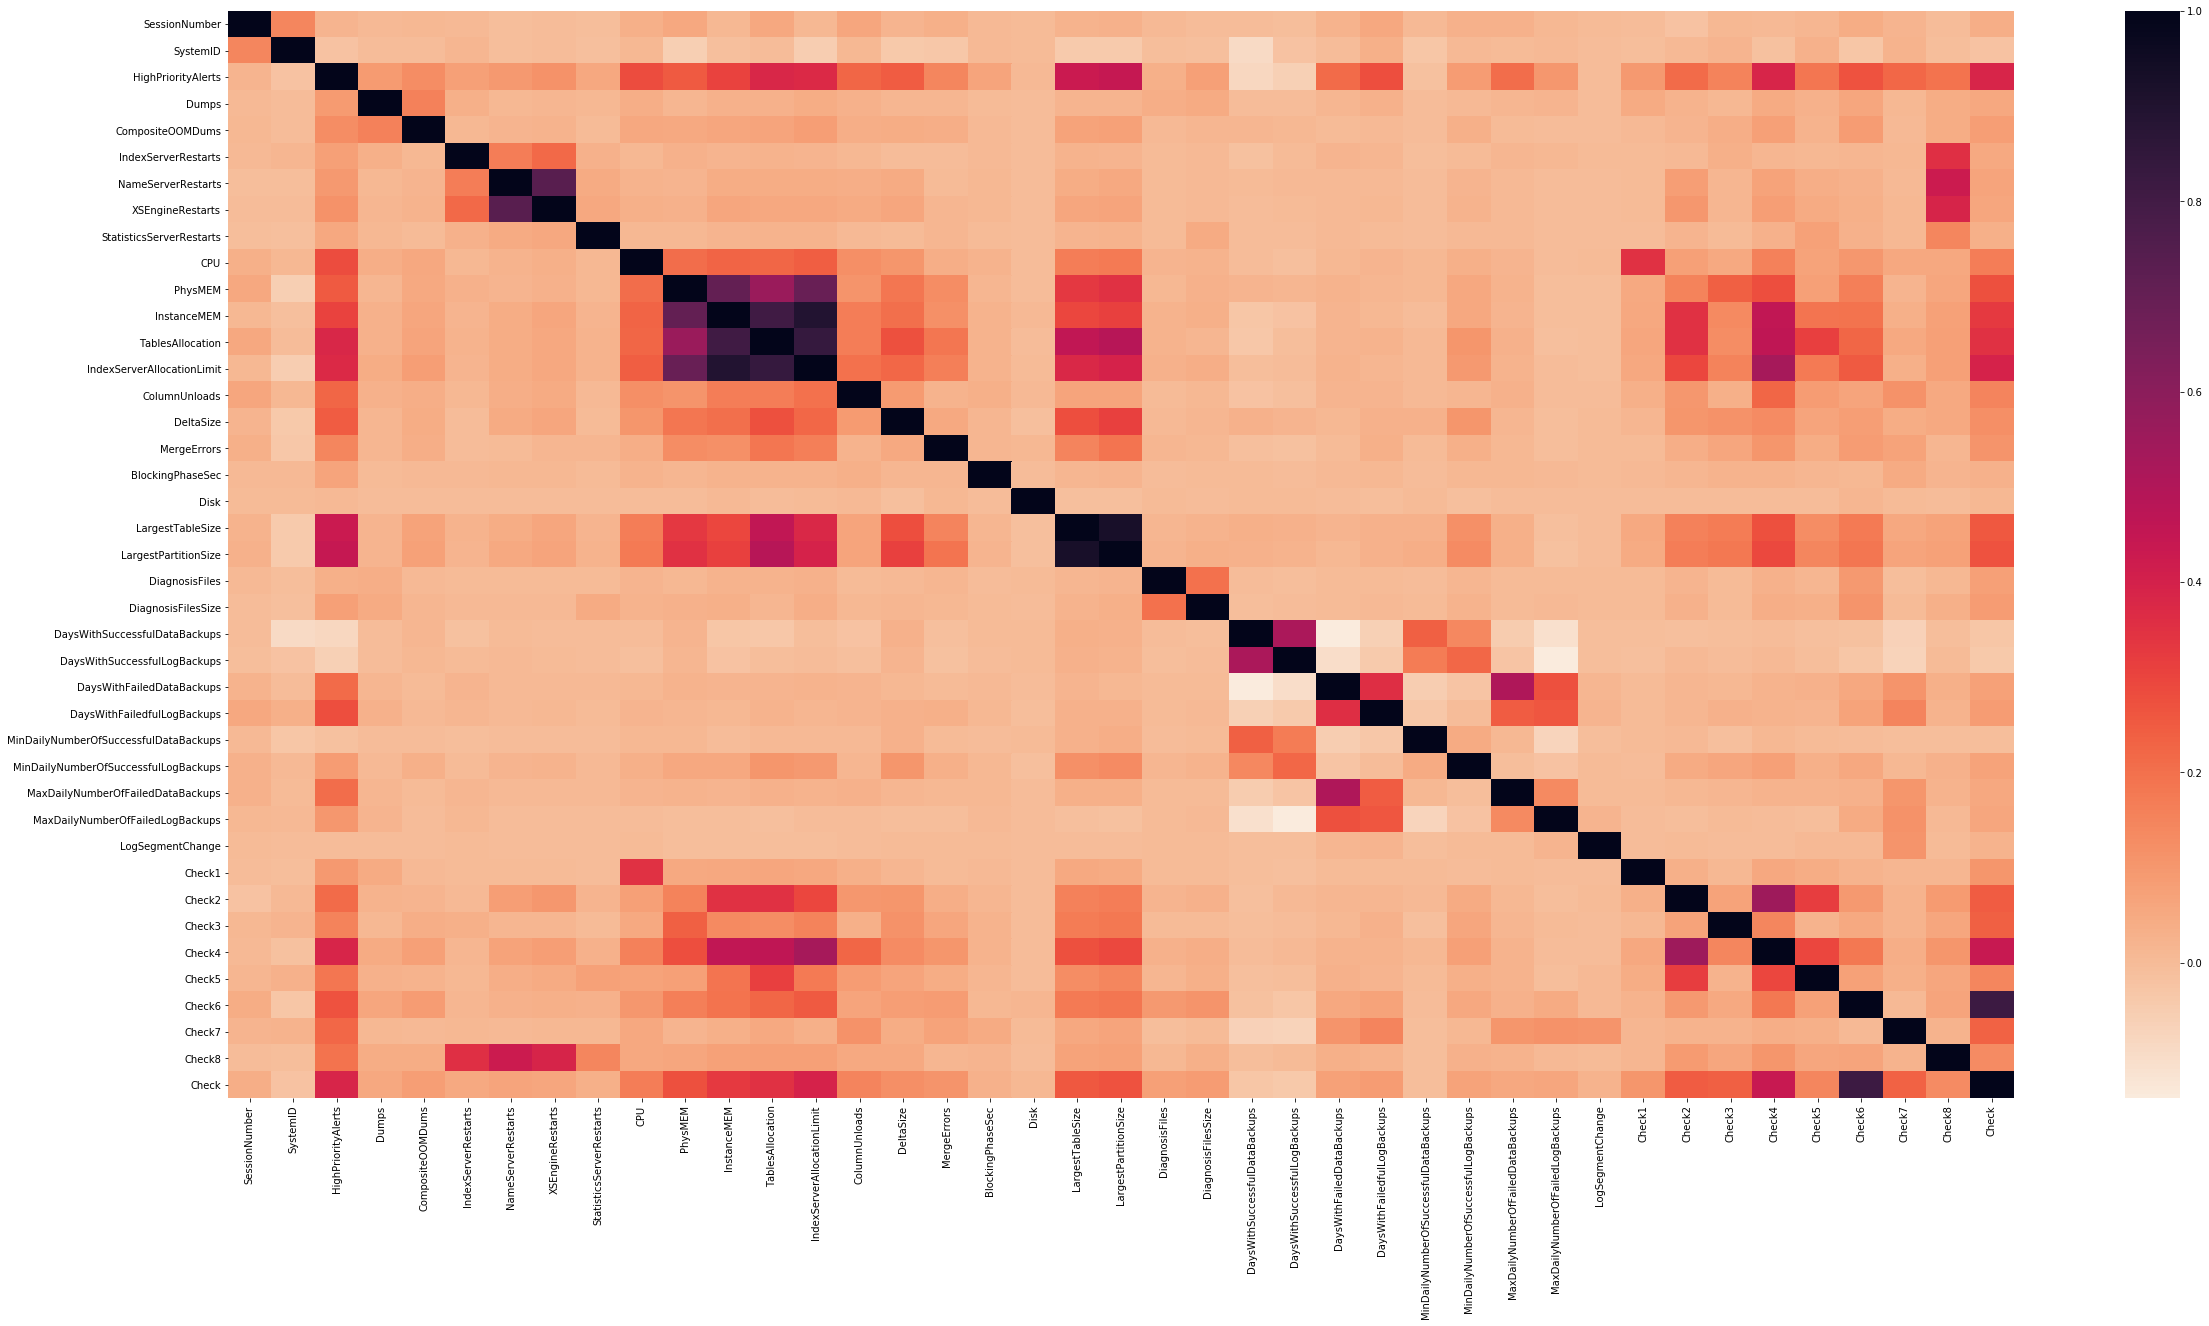

In [29]:
data_corr = data.corr()

fig, ax = plt.subplots(figsize=(40,20))
sn.heatmap(data_corr,xticklabels=data_corr.columns,yticklabels=data_corr.columns,ax=ax,cmap=sn.cm.rocket_r)
# sn.pairplot(data_corr)

In [30]:
data_corr[label_tags].style.background_gradient(cmap='coolwarm').set_precision(1)

,Check1,Check2,Check3,Check4,Check5,Check6,Check7,Check8
SessionNumber,-0.003,-0.02,0.01,0.009,0.02,0.04,0.02,-0.001
SystemID,-0.004,0.01,0.02,-0.01,0.03,-0.03,0.02,-0.004
HighPriorityAlerts,0.1,0.2,0.2,0.4,0.2,0.3,0.2,0.2
Dumps,0.05,0.02,0.01,0.05,0.03,0.06,0.01,0.04
CompositeOOMDums,0.009,0.02,0.04,0.08,0.02,0.09,0.009,0.04
IndexServerRestarts,0.001,0.009,0.03,0.02,0.01,0.02,0.01,0.4
NameServerRestarts,0.004,0.08,0.02,0.07,0.04,0.03,0.008,0.4
XSEngineRestarts,0.005,0.1,0.02,0.09,0.05,0.03,0.01,0.4
StatisticsServerRestarts,-0.001,0.02,0.002,0.03,0.08,0.03,0.01,0.1
CPU,0.4,0.08,0.05,0.2,0.07,0.1,0.06,0.06


<b> Checking the balance of anomalies </b>

In [31]:
nb_glob_anomalies = len(data[data["Check"] == 1])
nb_non_anomalies = len(data[data["Check"] == 0])
nb_data = len(data)

fraction_anomalies = nb_glob_anomalies/nb_data
print("The fraction of anomalies among the data is equal to " + str(fraction_anomalies) + ".")

The fraction of anomalies among the data is equal to 0.3605580467518416.


In [32]:
nb_1_anomalies = len(data[data["Check1"] == 1])
nb_2_anomalies = len(data[data["Check2"] == 1])
nb_3_anomalies = len(data[data["Check3"] == 1])
nb_4_anomalies = len(data[data["Check4"] == 1])
nb_5_anomalies = len(data[data["Check5"] == 1])
nb_6_anomalies = len(data[data["Check6"] == 1])
nb_7_anomalies = len(data[data["Check7"] == 1])
nb_8_anomalies = len(data[data["Check8"] == 1])
nb_all_anomalies = len(data[data["Check"] == 1])

fraction_anomalies_1 = nb_1_anomalies/nb_data
fraction_anomalies_2 = nb_2_anomalies/nb_data
fraction_anomalies_3 = nb_3_anomalies/nb_data
fraction_anomalies_4 = nb_4_anomalies/nb_data
fraction_anomalies_5 = nb_5_anomalies/nb_data
fraction_anomalies_6 = nb_6_anomalies/nb_data
fraction_anomalies_7 = nb_7_anomalies/nb_data
fraction_anomalies_8 = nb_8_anomalies/nb_data
fraction_anomalies_all = nb_all_anomalies/nb_data



print("The fraction of anomalies from Check1 among the data is equal to " + str(fraction_anomalies_1) + ".")
print("The fraction of anomalies from Check2 among the data is equal to " + str(fraction_anomalies_2) + ".")
print("The fraction of anomalies from Check3 among the data is equal to " + str(fraction_anomalies_3) + ".")
print("The fraction of anomalies from Check4 among the data is equal to " + str(fraction_anomalies_4) + ".")
print("The fraction of anomalies from Check5 among the data is equal to " + str(fraction_anomalies_5) + ".")
print("The fraction of anomalies from Check6 among the data is equal to " + str(fraction_anomalies_6) + ".")
print("The fraction of anomalies from Check7 among the data is equal to " + str(fraction_anomalies_7) + ".")
print("The fraction of anomalies from Check8 among the data is equal to " + str(fraction_anomalies_8) + ".")
print("The fraction of anomalies from Check among the data is equal to " + str(fraction_anomalies_all) + ".")

The fraction of anomalies from Check1 among the data is equal to 0.00649589410466969.
The fraction of anomalies from Check2 among the data is equal to 0.033975597077058974.
The fraction of anomalies from Check3 among the data is equal to 0.03136794147355786.
The fraction of anomalies from Check4 among the data is equal to 0.0979413467674791.
The fraction of anomalies from Check5 among the data is equal to 0.0119943705068657.
The fraction of anomalies from Check6 among the data is equal to 0.27511400568866196.
The fraction of anomalies from Check7 among the data is equal to 0.03009581126828423.
The fraction of anomalies from Check8 among the data is equal to 0.009919234524176814.
The fraction of anomalies from Check among the data is equal to 0.3605580467518416.


In [33]:
anom_fraction = [fraction_anomalies_1*100, fraction_anomalies_2*100, fraction_anomalies_3*100, fraction_anomalies_4*100, fraction_anomalies_5*100, fraction_anomalies_6*100, fraction_anomalies_7*100, fraction_anomalies_8*100]

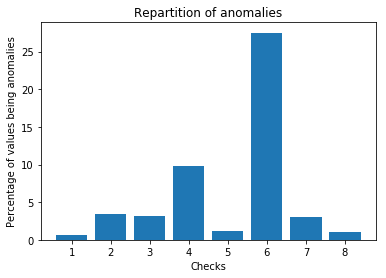

In [34]:
plt.bar( np.arange(1,9),anom_fraction, capsize=1, align='center', orientation='vertical')
plt.ylabel("Percentage of values being anomalies")
plt.title("Repartition of anomalies")
plt.xticks(np.arange(1,9))
plt.xlabel("Checks")
plt.show()

<p> 
</p>
<p>
</p>
<p>
</p>

<div class="">
    <h1>Model Selection</h1>
    <hr style="height:1px;border:none;color:#333;background-color:#333;"/>    
</div>

<p> first of all, divide the dataset into features and labels.</p>

In [35]:
y = data[label_tags]
X = data.drop(label_tags,axis=1)
X.drop(['SessionNumber','SystemID','Check'],axis=1,inplace=True) ## dropping them since they're not useful features
X_ind = X.index
X_cols = X.columns

<p> Then we normalize the features </p>

In [36]:
scaler = preprocess.MinMaxScaler()
X = scaler.fit_transform(X)
X = pd.DataFrame(X,columns=X_cols,index=X_ind)

/mnt/workspace/.local/lib/python3.5/site-packages/sklearn/preprocessing/data.py:334: DataConversionWarning: Data with input dtype float32 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


<b><h5>Note</h5></b>
<p> Since, this is a multi-class multi-label problem. We figured that, it would be better to separate the labels are train independent model for each set of label (i.e. When using a particular algorithm, we train 1 model for <i>Check1</i>, 1 model for <i>Check2</i> and so on.... </p><p> This way, we will calculate independent f1 scores and confusion matrices for each label </p> <p> This reasoning is followed for all the algorithms applied to this problem </p>

<h2> Interpretable Model </h2>

<p>We tried using the models recommended by the problem. However, they were not well documented and they seemed to not work. Therefore, we turned towards using other types of interpretable models.</p>

<p> The two interpretable models that we're going to use will be <b> Decision Tree </b> and <b> Random Forest</b>.<p> Random Forest is a combination of multiple Decision trees. </p><p>As an example we're going to show how to interpret the results of a very simple Random forest (max depth = 5) on our dataset</p> </p>

<p> Applying a very simple Random tree on our dataset and trying to interpret the results. We use 'Check1' as our target label and test size equal to 20% of the dataset.</p>

In [37]:
X_train,X_test,y_train,y_test = model_selection.train_test_split(X,y['Check1'],test_size=0.2,stratify =y['Check1'])

In [38]:
## using a small number of estimators and a shallow depth because this is only an example to explain
## the interpretability of the model. The real version with better results is applied below
m = ensem.RandomForestClassifier(n_estimators=10,n_jobs=-1,max_depth=5)
m.fit(X_train, y_train)
pred = m.predict(X_test)
met.f1_score(y_test,pred,average=None)

array([0.99930919, 0.88245931])

In [39]:
# # Generating dot files for each estimator inside the Forest
# estimators = m.estimators_
# for i,est in enumerate(estimators):
#     graph = Source(trees.export_graphviz(decision_tree=est,out_file='tree%d.dot'%(i),feature_names=X_cols))

<p> The above code generated <i>.dot</i> files for the estimators of random forest. we converted the <i>.dot</i> files for the trees into <i>.png</i> files using online resources </p>

<img src="first_tree_complete.png" width = 1000>

<p> The Random Forest creates a Tree representing a set of rules based on the features. At every node there is a rule (for instance <i> "CPU lower than 0.02" </i>). On the leaves, we find the last conditions, plus the tuple <i>value</i> containing the number of non anomalies, and number of anomalies detected for the criterias of the branch. </p>
<p> This technique is interesting because it is interpretable in the sense that we can understand the choices made by the computer. We can also try to understand why some criterias combinations lead to a certain percentage of anomalies.</p>

<img src="first_tree_left_zoom.png" width = 700>

<img src="first_tree_right_zoom.png" width = 700>

<p> On the leaves, we can notice some different paterns, and the colored ones are the most interesting for us.</p>
<p> In red are the leaves indacting a path that gives only anomalies. Some of them show a very big number of anomalies, like <i>value = [0, 113]</i> or <i>value = [0, 384]</i>. Those paths are thus very interesting. For others, like <i>value = [0, 4]</i>, it is hard to know how relatable they are. Indeed it indicated a 100% anomalies, but out of 4 examples only.</p>
<p>In orange are the leaves indicating paths that give mostly anomalies. Here, the ratio should be examined, like <i>75 out of 76</i> anomalies, and <i>200 out of 202</i> anomalies. But again, not only the ratio but also the general number of examples should be considered.</p>

<p> At the opposite, in blue are the leaves indacting paths that never lead to anomalies. Again, some values like <i>value = [16, 0]</i> can be discussed, but others like <i>value = [9130, 0]</i> show a very accurate set of rules to discriminate anomalies.</p> 
<p> Plus, the confrontation of two branches of a same node also gives us information, for instance on the path <i>IndexServerAllocationLimit smaller than 0.911, HighPriorityAlerts greater than 0.271, BlockingPhaseSec smaller than 0, PhysMEM smaller than 0.902</i>, on the node <i>CPU lower than 0.02 ?</i>, if the node condition is true we get only non-anomalies, while if it is false we get <i>200 out of 202</i> anomalies  </p>
<p>Finally, in green are the leaves indicating paths that give mostly non-anomalies. Again, the ratio and the amount should be examined. Thus, <i>1430 out of 1486</i> non-anomalies, is more interesting than <i>55 out of 65</i> non-anomalies.</p>


<img src="second_tree_zoom.png" width = 1000>

<p> By generating several trees, we can find paths leading to better results. Plus, we can also combine and compare paths. For instance, we realise that <i>CPU smaller than 0.2</i> is a rule leading to a 100% non-anomalies set of values. </p>

<h3>Decision Tree</h3>

In [40]:
## The parameters are self explanatory.
## The function returns the model, f1 score and confusion matrix (both calculated on the test set)
def DecTreeClass(X,y,to_check='Check1',test_size=0.2,max_depth=None):
    #Splitting the dataset
    X_train,X_test,y_train,y_test = model_selection.train_test_split(X,y[to_check],test_size=test_size,stratify =y[to_check])
    
    ## Using all the default parameters except max_depth which could be changed
    m = trees.DecisionTreeClassifier(max_depth=max_depth)
    ## Fitting on training data
    m.fit(X_train,y_train) 
    
    ## Predicting the results of test set
    pred = m.predict(X_test)
    
    ## Calculating metrics
    ## Note that the average is set to None, which calculates two f1 scores/label
    ## one f1 score for the normal data and one f1 score for the anomalous data
    f1 = met.f1_score(y_test,pred,average=None)
    conf = met.confusion_matrix(y_pred=pred,y_true=y_test)
    
    return m,f1,conf

In [41]:
## A dataframe keeping the f1 scores for all the checks
DT_f1 = pd.DataFrame(index=y.columns,columns=['Normal','Anomalous']) ### Dataframe which holds the f1_scores for each check using Decision Tree Classifier
## A dictionary keeping all the confusion matrices for all the checks
DT_conf = {}

In [42]:
for check in y.columns: ## iterating on all checks
    m,f1,conf = DecTreeClass(X,y,to_check=check,max_depth=5)
    DT_f1.loc[check,:] = f1
    DT_conf[check] = conf

In [43]:
DT_f1

,Normal,Anomalous
Check1,0.999915,0.987138
Check2,0.999584,0.988286
Check3,0.999225,0.976262
Check4,0.999074,0.991523
Check5,0.99954,0.962048
Check6,0.995846,0.989052
Check7,0.989089,0.535237
Check8,1,1


In [44]:
for keys in y.columns:
    print("\t" + keys)
    print(DT_conf[keys])

	Check1
[[47008     8]
 [    0   307]]
	Check2
[[45682    33]
 [    5  1603]]
	Check3
[[45792    47]
 [   24  1460]]
	Check4
[[42624    64]
 [   15  4620]]
	Check5
[[46735    20]
 [   23   545]]
	Check6
[[34165   139]
 [  146 12873]]
	Check7
[[45733   166]
 [  843   581]]
	Check8
[[46854     0]
 [    0   469]]


<h3> Random Forest </h3>

<p> For Random Forest we applied a different approach. Looking at the correlation table (in the data exploration part) we realize that some checks are dependent on other checks.</p>
<p> i.e. Check2 and Check4 have an intercorrelation of 0.6 . Therefore, when we have to find a model to calculate Check2, we could first make a model for Check4 and then calculate Check2 using the results of the previous model</p>

In [45]:
## Parameters X,y,label and test_size are self explanatory
## other_labels -> specify if we need to calculate and keep other anomalies as features before calculating 'label'
## n_estimators -> number of estimators for RandomForest. Default is 100
## n_jobs -> number of parallel estimator computations. if -1, it means to use the maximum number possible
## max_depth -> maximum depth of each estimator, None means it should be the maximum possible
## verbose -> If the model should print the results
def getRandomForestModel(X,y,label='Check1',other_labels=[],n_estimators=100,n_jobs=-1,max_depth=None,test_size=0.2,verbose=False):
    
    # Splitting the dataset
    X_train,X_test,y_train,y_test = model_selection.train_test_split(X,y[label],test_size=test_size,stratify=y[label])
    
    ## we would need these if we need to calculate 'other_labels'
    old_X_train = X_train
    old_X_test = X_test
    
    for other in other_labels:
        
        ## Recursively calling the function itself to calculate each label present inside 'other_labels'
        model = getRandomForestModel(X,y,label=other,n_estimators=n_estimators,n_jobs=n_jobs,max_depth=max_depth)[0]
        
        ## the number of rows in the original training set
        row = old_X_train.shape[0]
        ## predicting using the initial training set i.e. old_X_train
        ## The reason for this is that at each iteration we change X_train by appending 'other_labels' as features
        pred=model.predict(old_X_train)
        ## Appending the 'other_labels' in the original training set
        X_train = np.append(X_train,pred.reshape((row,1)),axis=1)
        
        ## doing the same thing for the test set
        row = old_X_test.shape[0]
        pred=model.predict(old_X_test)
        X_test = np.append(X_test,pred.reshape((row,1)),axis=1)
        
    ## we don't need these anymore, they just occupy space
    del old_X_train,old_X_test
    
    ## making the model
    m = ensem.RandomForestClassifier(n_estimators=n_estimators,n_jobs=n_jobs,max_depth=max_depth)
    m.fit(X_train, y_train)
    pred  = m.predict(X_test)
    
    ## Calculating metrics
    ## Note that the average is set to None, which calculates two f1 scores/label
    ## one f1 score for the normal data and one f1 score for the anomalous data
    score = met.f1_score(y_test,pred,average=None)
    conf = met.confusion_matrix(y_pred=pred,y_true=y_test)
    
    if(verbose):
        
        print("Label %s: Validation size %.2f Estimators %d Jobs %d Max_Depth %s\n"%(label,test_size,n_estimators,n_jobs,str(max_depth)))
        print("Score:" + str(score))
        print("Confusion Matrix \n" + str(conf))
    
    return m,score,conf

<p> First, we try the models using each check independently (without taking into account the correlations between them </p>

In [46]:
# The dataframe keeping f1 scores for all labels
RF_f1_indep = pd.DataFrame(index=y.columns,columns=['Normal','Anomalous'])
## confusion matrices for all labels
RF_conf = {}

In [47]:
for check in y.columns:
    m,f1,conf = getRandomForestModel(X,y,label=check)
    RF_f1_indep.loc[check,:] = f1
    RF_conf[check] = conf

In [48]:
RF_f1_indep

,Normal,Anomalous
Check1,0.999957,0.993528
Check2,0.999748,0.992881
Check3,0.999629,0.988636
Check4,0.999367,0.994204
Check5,0.999775,0.981595
Check6,0.998658,0.996476
Check7,0.993015,0.736928
Check8,0.999851,0.984848


In [49]:
for keys in y.columns:
    print("\t" + keys)
    print(RF_conf[keys])

	Check1
[[47012     4]
 [    0   307]]
	Check2
[[45696    19]
 [    4  1604]]
	Check3
[[45810    29]
 [    5  1479]]
	Check4
[[42638    50]
 [    4  4631]]
	Check5
[[46742    13]
 [    8   560]]
	Check6
[[34224    80]
 [   12 13007]]
	Check7
[[45777   122]
 [  522   902]]
	Check8
[[46854     0]
 [   14   455]]


<p> Now we try to use the interdependencies of the Checks </p>

<p> To establish dependencies, we used 0.1 correlation as a threshold between checks</p>

In [50]:
dependencies = {'Check1':[],
               'Check2':['Check4','Check5','Check6'],
               'Check3':['Check4'],
               'Check4':['Check2','Check3','Check5','Check6','Check8'],
               'Check5':['Check2','Check4'],
               'Check6':['Check2','Check4'],
               'Check7':[],
               'Check8':['Check4']}

In [51]:
RF_f1_dep = pd.DataFrame(index=y.columns,columns=['Normal','Anomalous'])
RF_conf_dep = {}

In [52]:
## Making new models but this time using other labels as their features
for check in y.columns:
    m,f1,conf = getRandomForestModel(X,y,label=check,other_labels=dependencies[check])
    RF_f1_dep.loc[check,:] = f1
    RF_conf_dep[check] = conf

In [53]:
RF_f1_indep

,Normal,Anomalous
Check1,0.999957,0.993528
Check2,0.999748,0.992881
Check3,0.999629,0.988636
Check4,0.999367,0.994204
Check5,0.999775,0.981595
Check6,0.998658,0.996476
Check7,0.993015,0.736928
Check8,0.999851,0.984848


In [54]:
for keys in y.columns:
    print("\t" + keys)
    print(RF_conf_dep[keys])

	Check1
[[47011     5]
 [    0   307]]
	Check2
[[45705    10]
 [    3  1605]]
	Check3
[[45811    28]
 [   10  1474]]
	Check4
[[42645    43]
 [    5  4630]]
	Check5
[[46751     4]
 [   11   557]]
	Check6
[[34249    55]
 [   12 13007]]
	Check7
[[45778   121]
 [  509   915]]
	Check8
[[46854     0]
 [   13   456]]


<p> Using dependencies <b>was not</b> very useful since almost all the classes gave very good results (except Check7). Whereas, Check7 doesn't have any dependency on any other check.</p>

<h1>Non interpretable models</h1>
<p> After trying interpretable models, we thought we could also try some non-interpretable models to see how they do </p>

<h2>PCA and MultiVariate Gaussian</h2>

<p> The idea here is to first perform the PCA on the input data and reduce its dimensions. After reducing the dimensions, we could make a multivariate gaussian of all the normal points.</p>
<p> The gist is that the normal points will have a higher pdf for this gaussian function, whereas the anomalous points will have a lower pdf</p>

In [55]:
import scipy.stats as stats

In [56]:
## Params: X -> input dataset
## ratio -> The minimum explained variance ratio. 
##          the sum of variance explained by all the Principal components should be greater or equal to this
def getPCAModel(X,ratio=0.95):
     ## iterate over the number of components to keep.
    ## Go from 1 to the maximum number of components (maximum number of features of the input dataset)
    for i in np.arange(1,X.shape[1]):
        model = decom.PCA(n_components=i).fit(X) ## performing PCA and keeping 'i' principal components
        ## if the explained variance sums is greater than ratio
        ## this is the right model
        if( np.sum(model.explained_variance_ratio_) >= ratio ):
            return model 
    
    return model

In [57]:
## params: X,y,label, test_size are self explanatory
## ratio -> The same minimum explained variance ratio that was mentioned in getPCAModel()
## Threshold -> When we calculate the pdf of the record on the multi-variate gaussian (of normal records)
##             if it is greater than Threshold, then it is a normal record (lies near the centre of the gaussian)
##             otherwise, it is an anomaly. (lies far away from the center of the gaussian)
def getMVG(X,y,label='Check1',test_size=0.2,ratio=0.95,Threshold=0.1):
    
    X_train,X_test,y_train,y_test = model_selection.train_test_split(X,y[label],test_size=test_size,stratify=y[label])
    
    ## Get the PCA model
    PCA_Model = getPCAModel(X_train,ratio=ratio)
    
    ## transform the X_train into principal components.
    ## We convert it into a pandas Dataframe because it's easy to manipulate a pandas dataframe
    PCA_X = PCA_Model.transform(X_train)
    PCA_X = pd.DataFrame(PCA_X, index=X_train.index)
    
    ## trX is the set of only the normal records present in the training set
    trX = PCA_X[y_train==0] ## for training we only need normal points
    
    ## using the normal records present in the training set (i.e. trX)
    ## we make a multivariate gaussian
    ## the mean is the mean of trX
    ## the the covariance is the covariance of trX
    distrib = stats.multivariate_normal(mean=trX.mean(axis=0),cov=trX.cov())
    
    ## The test set is transformed into principal components using PCA model
    tsX = PCA_Model.transform(X_test)
    
    ## Predictions (initially all zeros)
    PCA_pred = pd.Series(np.zeros(X_test.shape[0]),index = X_test.index)
    
    for i in np.arange(X_test.shape[0]): ## iterating through all the test records
        if ( distrib.pdf( tsX[i,:] ) < Threshold): ## calculating the pdf and check if it's lower than 'Threshold'
            PCA_pred.iloc[i] = 1 ## if lower, then it's an anomaly.
    
    ## Calculating metrics
    ## Note that the average is set to None, which calculates two f1 scores/label
    ## one f1 score for the normal data and one f1 score for the anomalous data
    score = met.f1_score(y_test,PCA_pred,average=None)
    conf = met.confusion_matrix(y_pred=PCA_pred,y_true=y_test)
    
    return score,conf

In [58]:
getMVG(X,y)

(array([0.9579039 , 0.02700637]), array([[43451,  3565],
        [  254,    53]]))

In [59]:
PCA_f1 = pd.DataFrame(index=y.columns,columns=['Normal','Anomalous'])
PCA_conf = {}

In [60]:
for check in y.columns:
    f1,conf = getMVG(X,y,label=check,ratio=0.99) ## the minimum variance ratio is set to 99%
    PCA_f1.loc[check,:] = f1
    PCA_conf[check] = conf

In [61]:
PCA_f1

,Normal,Anomalous
Check1,0.967641,0.0275591
Check2,0.957938,0.13688
Check3,0.957072,0.0998143
Check4,0.936459,0.30517
Check5,0.968495,0.12682
Check6,0.82917,0.181696
Check7,0.961076,0.169851
Check8,0.966633,0.0672989


In [62]:
for keys in y.columns:
    print("\t" + keys)
    print(PCA_conf[keys])

	Check1
[[44317  2699]
 [  265    42]]
	Check2
[[43226  2489]
 [ 1307   301]]
	Check3
[[43230  2609]
 [ 1269   215]]
	Check4
[[40603  2085]
 [ 3425  1210]]
	Check5
[[44236  2519]
 [  359   209]]
	Check6
[[32462  1842]
 [11534  1485]]
	Check7
[[43444  2455]
 [ 1064   360]]
	Check8
[[44164  2690]
 [  359   110]]


<h2>Auto Encoder Technique</h2>

In [63]:
import keras.optimizers as optims
import keras.utils as utils
import keras.layers as layers
import keras.models as models

Using TensorFlow backend.


In [64]:
## params: X,y,label,test_size are self-explanatory
## epochs -> number of epochs to train
## Thresold -> If the input and output have a difference smaller than this number, then it's not an anomaly
## verbose -> if true, prints the model summary and the progress
## Note: The shape of the neural network is very simple:
##       input(40) -> layer1(15) -> layer2(15) -> output(15)
def AutoEncoder(X,y,label='Check1',epochs=5,Thresold=0.1,test_size=0.2,verbose=False):
    X_train,X_test,y_train,y_test = model_selection.train_test_split(X,y[label],test_size=test_size,stratify=y[label])
    #create model
    
    model = models.Sequential()
    ## Input layer and the first layer. Activation is relu since it's an internal layer
    model.add(layers.Dense(15,activation='relu',input_shape=(X_train.shape[1],)))
    ## The second layer, activation is relu since it's an internal layer
    model.add(layers.Dense(15,activation='relu'))
    ## the output layer, activation is sigmoid since it's an output layer
    model.add(layers.Dense(X.shape[1],activation='sigmoid'))
    if(verbose):
        print(model.summary())
    # using adam optimizer with default parameters
    model.compile(optimizer='adadelta', loss='binary_crossentropy')
    
    ## ind keeps the index of all the normal records in the training set
    ind = y_train[y_train==0].index
    ## keeping only the normal records for training
    X_train = X_train.loc[ind,:]
    
    ## fitting the model. Notice the input and output is the same since it's an auto-encoder
    model.fit(X_train,X_train,epochs=epochs,verbose=(1 if verbose else 0))
    
    ## predicting the X_test features
    predictions = model.predict(X_test)
    
    ## The AE_pred are the predictions of the labels. initially all normal
    AE_pred = pd.Series(np.zeros(X_test.shape[0]),index=X_test.index)
    for i in np.arange(X_test.shape[0]): ## to iterate through the results of the AutoEncoder
        
        ## If the predictions of features and the test set have a difference greater than threshold
        if(np.allclose(predictions[i,:],X_test.iloc[i,:],atol=Thresold) == False):
            AE_pred.iloc[i] = 1 # it's an anomaly
    
    conf = met.confusion_matrix(y_true=y_test,y_pred=AE_pred)
    f1 = met.f1_score(y_pred=AE_pred,y_true=y_test,average=None)
    
    return f1,conf

In [65]:
AE_f1 = pd.DataFrame(index=y.columns,columns=['Normal','Anomalous'])
AE_conf = {}

In [66]:
for check in y.columns:
    f1,conf = AutoEncoder(X,y,label=check)
    AE_f1.loc[check,:] = f1
    AE_conf[check] = conf

In [67]:
AE_f1

,Normal,Anomalous
Check1,0.8793,0.0200405
Check2,0.854162,0.113529
Check3,0.866429,0.0911939
Check4,0.850722,0.328804
Check5,0.844329,0.0575389
Check6,0.785559,0.336778
Check7,0.830011,0.117609
Check8,0.808969,0.0432933


In [68]:
for keys in y.columns:
    print("\t" + keys)
    print(AE_conf[keys])

	Check1
[[37048  9968]
 [  203   104]]
	Check2
[[34711 11004]
 [  849   759]]
	Check3
[[35748 10091]
 [  931   553]]
	Check4
[[32934  9754]
 [ 1804  2831]]
	Check5
[[34292 12463]
 [  182   386]]
	Check6
[[28092  6212]
 [ 9125  3894]]
	Check7
[[32934 12965]
 [  525   899]]
	Check8
[[31911 14943]
 [  128   341]]
